# **Deepfake Image Classification Model Of Brak Obama**

# connecting google colab with google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Unziping the rar file which was in my google drive

In [ ]:
!unrar x '/content/drive/Shareddrives/Zeshan Movies/obama.rar'

extrating images from **videos**

In [ ]:
import cv2
import os

vid=cv2.VideoCapture('/content/obama/obamadeepfake/President Obama on Death of Osama bin Laden(720P_HD).mp4')

try:
    #creating folder name realkapil
    if not os.path.exists('dfobama'):
        os.makedirs('dfobama')
        
#if not created then raise error
except OSError:
    print('Error Creating directory of data')
    
#frame

currentframe=0

while(True):
    
    #reading from frame
    ret,frame=vid.read()
    
    if ret:
        #if video is still left continue creating images
        name='.dfobama/realframe'+str(currentframe)+'.jpg'
        print('Creating..'+name)
        
        #write the extracted images
        cv2.imwrite(name,frame)
        
        
        currentframe+=1
        
    else:
        break
        

        
        
vid.release()
cv2.destroyAllWindows()

Importing Required Libries for Model Building

1.Libraries:  These are code written by someone else that helps you perform some common tasks in a less verbose way. An end-to-end accessible platform, an open-source AI library is a Machine Learning framework that offers techniques and technologies for software development and the creation of applications. An AI library is empowered by artificial intelligence and is available for commercial and non-commercial uses by the public. 

 

2.NumPy:NumPy can be used to perform a wide variety of mathematical operations on arrays.NumPy arrays facilitate advanced mathematical and other types of operations on large numbers of data. Typically, such operations are executed more efficiently and with less code than is possible using Python's built-in sequences. 

3.Pandas: Pandas is a Python library. Pandas is used to analyze data. Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.  

  

4.Matplotlib: Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. 

  

5.Tensorflow: TensorFlow is an open-source library developed by Google primarily for deep learning applications.TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. 

 

6.Keras: Keras is used for creating deep models which can be productized on smartphones. Keras is also used for distributed training of deep learning models.Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code. 

7.OS: The OS module in Python provides functions for interacting with the operating system. OS comes under Python's standard utility modules. This module provides a portable way of using operating system-dependent functionality. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


Giving the rquired path address for data traning

4.Train & Test: Train/Test is a method to measure the accuracy of your model. It is called Train/Test because you split the data set into two sets: a training set and a testing set. 80% for training, and 20% for testing. You train the model using the training set. 

The “training” data set is the general term for the samples used to create the model, while the “test” data set is used to qualify performance. Perhaps traditionally the dataset used to evaluate the final model performance is called the “test set”. 

5.Validation:  In machine learning, model validation is referred to as the process where a trained model is evaluated with a testing data set. The testing data set is a separate portion of the same data set from which the training set is derived. 

In [ ]:
train='/content/obama/obama database/obama_train'
valid='/content/obama/obama database/obama_vaild'


train_real=os.path.join(train,"rlobama")
train_fake=os.path.join(train,"dfobama")

Creating Array of real Images and Deepfake images:

**here  names for fake images is realframXXXX therefore its showing names in train_fake_names as realframe1671**

In [ ]:
train_real_names=os.listdir(train_real)
print(train_real_names[:10])


train_fake_names=os.listdir(train_fake)
print(train_fake_names[:10])

['realframe6038.jpg', 'realframe569.jpg', 'realframe4680.jpg', 'realframe1976.jpg', 'realframe5466.jpg', 'realframe3246.jpg', 'realframe343.jpg', 'realframe4039.jpg', 'realframe316.jpg', 'realframe1115.jpg']
['realframe569.jpg', 'realframe343.jpg', 'realframe316.jpg', 'realframe220.jpg', 'realframe755.jpg', 'realframe295.jpg', 'realframe224.jpg', 'realframe286.jpg', 'realframe689.jpg', 'realframe254.jpg']


Creating a 4x4 graph space to show images in plot
for that reason we take 8 real and 8 fake images


In [ ]:
import matplotlib.image as mimg
nrows=4
ncols=4
plt.figure(figsize=(16,9))

real_pic=[]
for i in train_real_names[0:8]:
    real_pic.append(os.path.join(train_real,i))
    
    
    
fake_pic=[]
for i in train_fake_names[0:8]:
    fake_pic.append(os.path.join(train_fake,i))   

plt.show()

<Figure size 1152x648 with 0 Axes>

In [ ]:
print(real_pic)
print(fake_pic)

['/content/obama/obama database/obama_train/rlobama/realframe6038.jpg', '/content/obama/obama database/obama_train/rlobama/realframe569.jpg', '/content/obama/obama database/obama_train/rlobama/realframe4680.jpg', '/content/obama/obama database/obama_train/rlobama/realframe1976.jpg', '/content/obama/obama database/obama_train/rlobama/realframe5466.jpg', '/content/obama/obama database/obama_train/rlobama/realframe3246.jpg', '/content/obama/obama database/obama_train/rlobama/realframe343.jpg', '/content/obama/obama database/obama_train/rlobama/realframe4039.jpg']
['/content/obama/obama database/obama_train/dfobama/realframe569.jpg', '/content/obama/obama database/obama_train/dfobama/realframe343.jpg', '/content/obama/obama database/obama_train/dfobama/realframe316.jpg', '/content/obama/obama database/obama_train/dfobama/realframe220.jpg', '/content/obama/obama database/obama_train/dfobama/realframe755.jpg', '/content/obama/obama database/obama_train/dfobama/realframe295.jpg', '/content/ob

In [ ]:
pics=real_pic+fake_pic
len(pics)

16

Showing the plot of 1st 16 images form the data

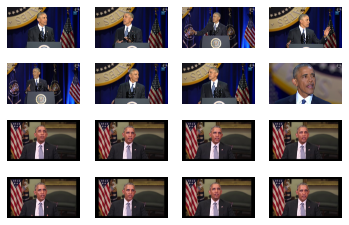

In [ ]:
for i in range(0,len(pics)):
    data=pics[i].split("/",2)[2]
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('off')
    image=mimg.imread(pics[i])
    plt.imshow(image,cmap="gray")
    
plt.show()

**Image augmentation** is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.


In [ ]:
train_dgen=ImageDataGenerator(rescale=1/255,
                             zoom_range=0.3,
                             rotation_range=50,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

valid_dgen=ImageDataGenerator(rescale=1/255)

Dividing Data into batch size of 32

In [ ]:
train_gen=train_dgen.flow_from_directory(train,
                                        target_size=(120,120),
                                        batch_size=32,
                                        class_mode='binary')

Found 6739 images belonging to 2 classes.


In [ ]:
valid_gen=valid_dgen.flow_from_directory(valid,
                                        target_size=(120,120),
                                        batch_size=32,
                                        class_mode='binary')

Found 1878 images belonging to 2 classes.


In [ ]:
print(train_gen.class_indices)
print(train_gen.image_shape)

{'dfobama': 0, 'rlobama': 1}
(120, 120, 3)


In [ ]:
print(valid_gen.class_indices)
print(train_gen.image_shape)

{'fakeobm': 0, 'realobm': 1}
(120, 120, 3)


### Creating A 2 **layerd** CNN Model 

CNN:In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery. A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data. 


1.Layers:Keras Layers are the functional building blocks of Keras Models. Each layer is created using numerous layer_() functions. These layers are fed with input information, they process this information, do some computation and hence produce the output. Further, this output of one layer is fed to another layer as its input. 

 

2.Conv2D: 
Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs. 

3.Kernel:In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image. 

4.Maxpooling2D:Max pooling operation for 2D spatial data. Down samples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size ) for each channel of the input. The window is shifted by strides along each dimension. 

5.Dropout: The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged. 

  

6.Flatten: Flatten is used to flatten the input. For example, if flatten is applied to layer having input shape as (batch_size, 2,2), then the output shape of the layer will be (batch_size, 4). 

 

7.Dense: Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output. output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use bias is True). These are all attributes of Dense. 

 

In [ ]:
#performing CNN and Building modle

model=Sequential()
#adding 1st layer
model.add(Conv2D(32,(3,3),padding="SAME",activation="relu",input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


#adding 2nd layer
model.add(Conv2D(64,(3,3),padding="SAME",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#falttening the layer
model.add(Flatten())


model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [ ]:
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

padding=”SAME” 

SAME padding sometimes called HALF padding. It is called SAME because for a convolution with a stride=1, (or for pooling) it should produce output of the same size as the input. 

activation=”relu” 

The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better 

 

Model optimizers (Adam): 

Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. 

In [ ]:
model.compile(Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

Training Model for 30 times with 70 steps in each step

In [ ]:
trainning=model.fit(train_gen,
                    steps_per_epoch=70,
                    epochs=30,
                    validation_data=valid_gen,
                    validation_steps=50)

Epoch 1/30
70/70 [==============================] - 133s 2s/step - loss: 0.3116 - accuracy: 0.9111 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 2/30
70/70 [==============================] - 117s 2s/step - loss: 0.0120 - accuracy: 0.9982 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 3/30
70/70 [==============================] - 116s 2s/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 4/30
70/70 [==============================] - 116s 2s/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 5/30
70/70 [==============================] - 115s 2s/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 6.5389e-04 - val_accuracy: 1.0000
Epoch 6/30
70/70 [==============================] - 116s 2s/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 2.2925e-04 - val_accuracy: 1.0000
Epoch 7/30
70/70 [==============================] - 116s 2s/step - loss: 5.2662e-04 - accuracy: 1.0000 - val_loss: 2.8022e-05 - val_accuracy: 1.00

ploting a trainning and accuracy plot

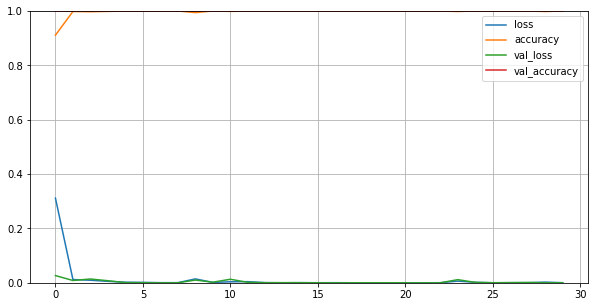

In [ ]:
pd.DataFrame(trainning.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [ ]:
test_loss ,test_acc=model.evaluate(valid_gen)

59/59 [==============================] - 36s 606ms/step - loss: 1.3216e-04 - accuracy: 1.0000


Testing Model Accurcy on validation data set
**here we got 100% Accurcy for validation data**

In [ ]:
model.save("Obama_Deepfake_detection_model.h5")

Saving the model

In [ ]:
modelobama=keras.models.load_model('/content/obama/Obama_Deepfake_detection_model1.h5')

Loading the save model for next time

### **Model Testing For Unseen data (Completely New Dataset)**

In [ ]:
newtestdata='/content/obama/obamadeepfake/Test1'

In [ ]:
newtest_dgen=ImageDataGenerator(rescale=1/255)
newtest_gen=newtest_dgen.flow_from_directory(newtestdata,
                                        target_size=(120,120),
                                        batch_size=32,
                                        class_mode='binary')

Found 240 images belonging to 2 classes.


Reshapeing the iamges of newdata

In [ ]:
test_loss ,test_acc=modelobama.evaluate(newtest_gen)

8/8 [==============================] - 7s 787ms/step - loss: 1.6676 - accuracy: 0.8667


`Here we got accuracy of 86% for unseen data`

In [ ]:
predict=modelobama.predict(newtest_gen)

In [ ]:
predict

In [ ]:
X, y = newtest_gen.next()

# Evaluating prediction
print(f"Predicted likelihood: {modelobama.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(modelobama.predict(X)[0][0])==y[0]}")



Predicted likelihood: 0.0004
Actual label: 0

Correct prediction: True


In [ ]:
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

Creatiing an array for each predicted image class

*   correct_real
*   correct_deepfake
*   missclassified_real
*   missclassified_fakes

In [ ]:
for i in range(len(newtest_gen.labels)):
    
    # Loading next picture, generating prediction
    X, y = newtest_gen.next()
    pred = modelobama.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(newtest_gen.labels)-1:
        print("All", len(newtest_gen.labels), "predictions completed")

0  predictions completed.
All 240 predictions completed


In [ ]:
len(correct_real)

96

In [ ]:
len(correct_deepfake)

106

In [ ]:
len(misclassified)

38

## **Testing Model for random uplaoded images**

In [ ]:
#now seeing how model works by providing data which was not present prviously
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for fname in uploaded.keys():
  img_path="/content/"+fname
  img= image.load_img(img_path , target_size=(120,120))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=modelobama.predict(images)
  print(fname)
  if prediction==0:
    print("Real Image Of Brak Obama")

  else:
    print("Deepfake Image Of Brak Obama")


Saving df3.jpg to df3 (1).jpg
Saving df2.jpg to df2.jpg
Saving df1.jfif to df1.jfif
Saving Barack_Obama_in_2016.jpg to Barack_Obama_in_2016 (1).jpg
Saving download (1).jfif to download (1).jfif
Saving download.jfif to download (2).jfif
df3.jpg
Deepfake Image Of Brak Obama
df2.jpg
Real Image Of Brak Obama
df1.jfif
Deepfake Image Of Brak Obama
Barack_Obama_in_2016.jpg
Deepfake Image Of Brak Obama
download (1).jfif
Deepfake Image Of Brak Obama
download.jfif
Deepfake Image Of Brak Obama


## End